# rainfall spatially dependent

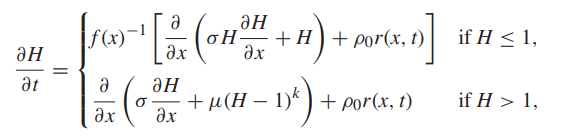

In [43]:
import numpy as np
import matplotlib.pyplot as plt

L=1 # length of domain
nx = 201 # number of grid points
dx =   L/ (nx-1) # grid space 
x = np.linspace(0,L,nx) # coordinates of the grid points


from scipy.sparse import diags

def d1_mat(nx,dx): # matrix representing central finite differences for the first derivative
    diagonals = [[-1./2.], [0], [1./2.]] # main diagonal elements
    offsets = [-1, 0, 1]# positions of the elements with the respect to the diagonal
    mat = diags(diagonals, offsets, shape=(nx,nx)).toarray()
    return mat /dx
def d2_mat(nx,dx):
    diagonals = [[1],[-2],[1]]
    offsets = [-1,0,1]
    mat = diags(diagonals, offsets, shape=(nx,nx)).toarray()
    return mat /dx**2

d1mat = d1_mat(nx,dx)
d2mat = d2_mat(nx,dx)
print (d1mat)
print(d2mat)


[[   0.  100.    0. ...    0.    0.    0.]
 [-100.    0.  100. ...    0.    0.    0.]
 [   0. -100.    0. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...    0.  100.    0.]
 [   0.    0.    0. ... -100.    0.  100.]
 [   0.    0.    0. ...    0. -100.    0.]]
[[-80000.  40000.      0. ...      0.      0.      0.]
 [ 40000. -80000.  40000. ...      0.      0.      0.]
 [     0.  40000. -80000. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ... -80000.  40000.      0.]
 [     0.      0.      0. ...  40000. -80000.  40000.]
 [     0.      0.      0. ...      0.  40000. -80000.]]


In [44]:
#euler method 
mu=100 
rho0=1.5
sigma=0.1 
f=0.5

tf =4 # final time
dt=0.00005 # time step
nt=int(tf/dt) # number of time intervals 
H= np.empty([nt+1,nx])# creates an array for solution
J= np.empty([nt+1,nx])
K= np.empty([nt+1,nx])
Q= np.empty([nt+1,nx])
#for i in range(nt):
    #H[i+1]= H[i]+dt*((1/f)(sigma*np.dot(d1mat@H[i],d1mat@H[i]) + sigma*H*d2mat@H+ d1mat@H +rho0*r)) 
    
    #H[i+1]= H[i]+dt *(sigma*d2mat@(1/2*H**2)+H



In [109]:

x = np.linspace(0,1,nx) # coordinates of the grid points
H[0]= 1-x


We choose how the rainfall varies spatially

In [187]:
#r=1
#r=3*(1-x**2)
r=2-2*x

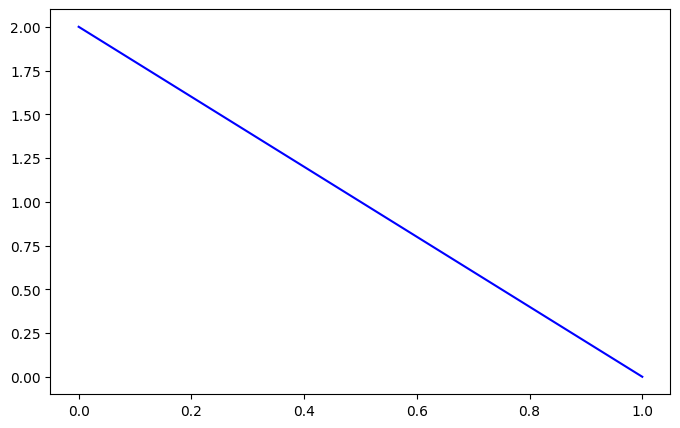

In [188]:
fig, ax = plt.subplots(figsize=(8,5))
line,=ax.plot(x,r,color='blue',label='initial condition')

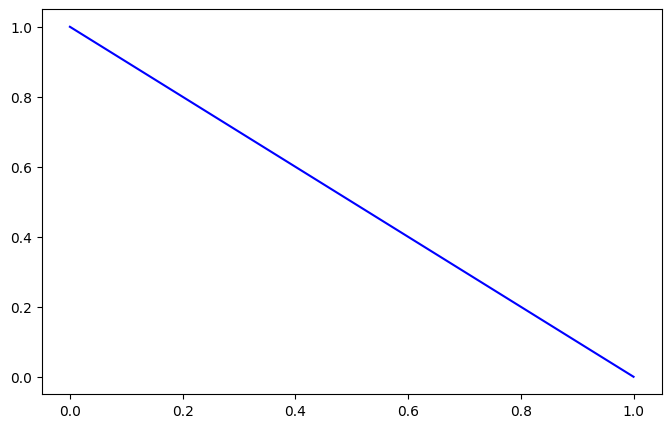

In [189]:
fig, ax = plt.subplots(figsize=(8,5))
line,=ax.plot(x,H[0],color='blue',label='initial condition')

We define the function fn

In [48]:
#rainfall spatially dependent

def fn(H): 
    u=H*H/2
    v= sigma*(d2mat@u)+d1mat@H +rho0*r
    return((v/f))
    

We define the function seep

In [49]:
#r= 4*x**3
#r=3*(1-x**2)

def seep(H): 
    c= sigma*d2mat@H + mu*5/3*(np.abs(H-1))**(2/3) *(d1mat@H)+rho0*r  #using a linear approximation
    return (c)
 
    
    

Time integration of the PDE

1.5


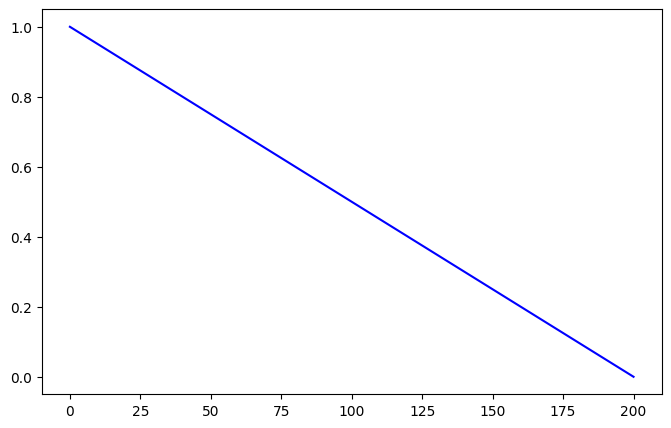

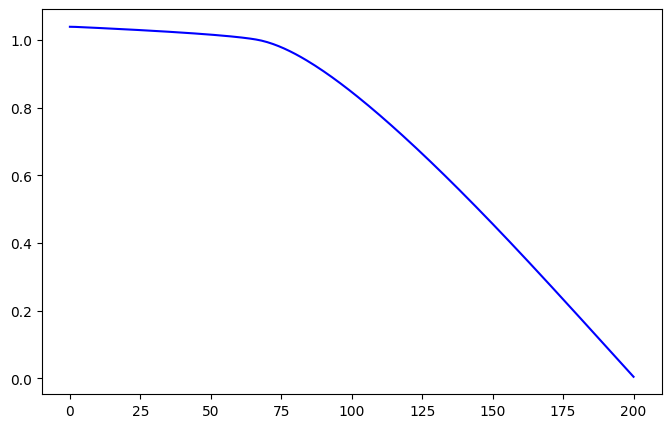

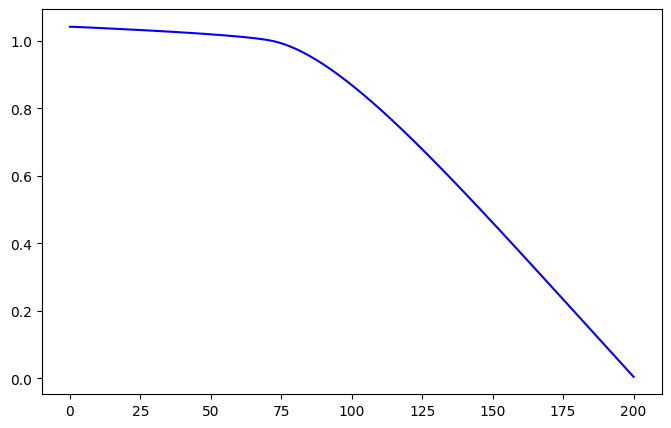

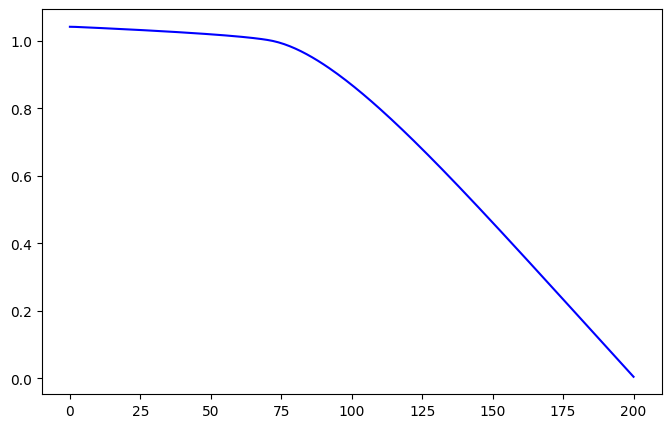

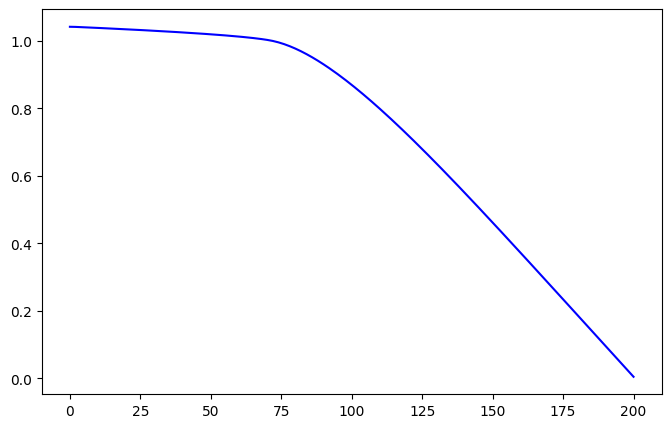

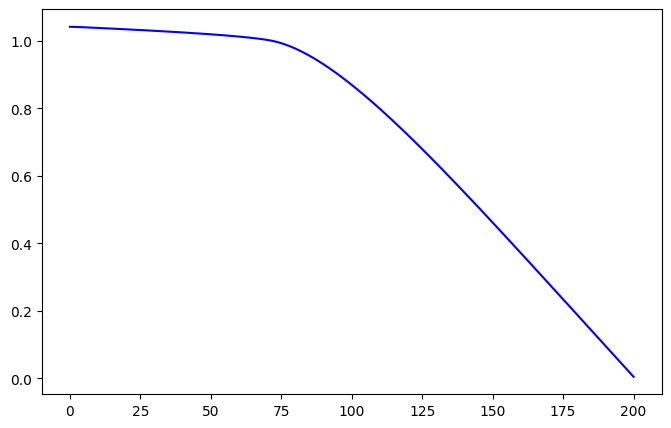

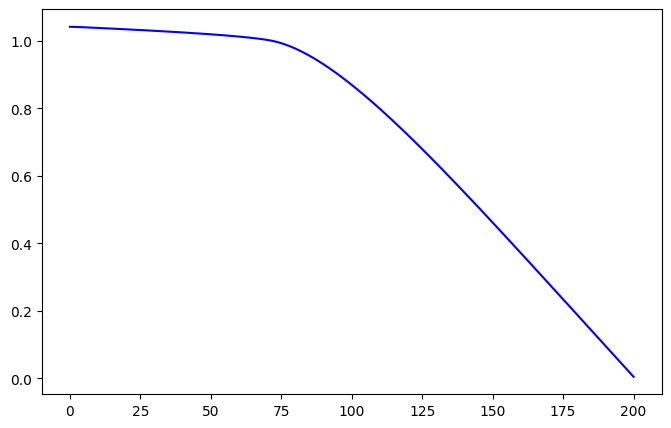

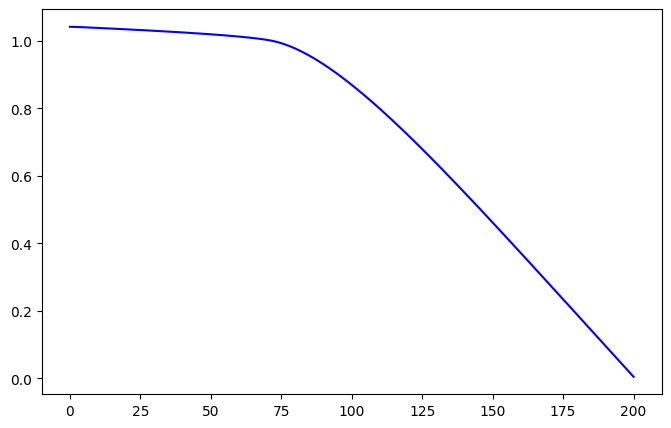

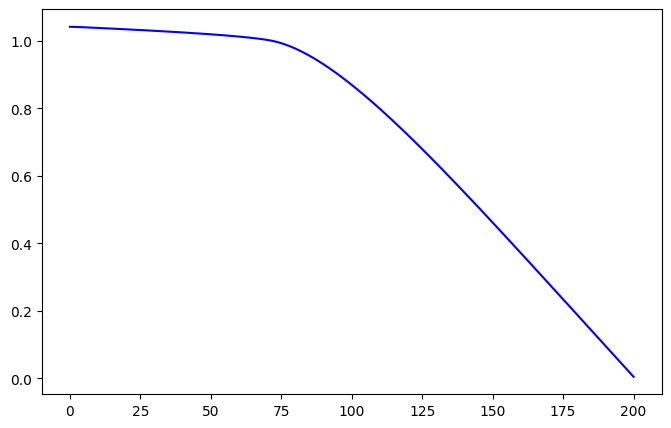

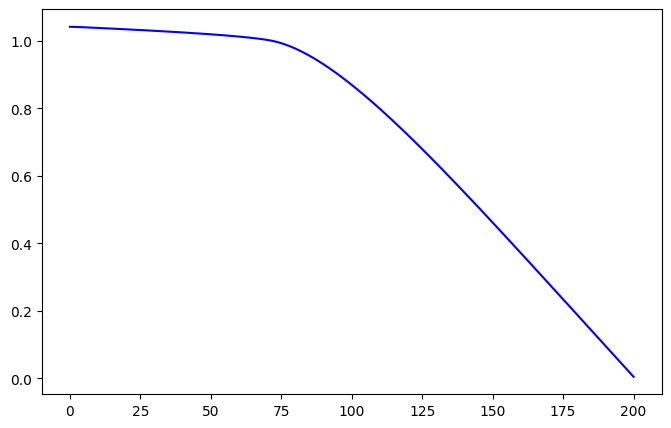

In [50]:
#the part relating to H>1 multiplied by (sign(H-1)+1)/2
print(rho0)
#the part relating to H<1 multiplied by (sign(1-H)+1)/2
#Q[nx+1/2] =0
d1mat[nx-1,nx-2:nx]= np.array([-0.5,-0.5])/dx
d2mat[nx-1,nx-2:nx]= np.array([1,-1])/dx**2
for i in range(nt):
    H[i+1]=H[i]+seep(H[i])*dt*(np.sign(H[i]-1)+1)/2 +fn(H[i])*dt*(np.sign(1-H[i])+1)/2
    H[i+1,0]=4.0/3.0*H[i+1,1]-1/3*H[i+1,2]# implementing boundary conditions
    if H[i+1,0]<=1 :    
        H[i+1,0]=1
    #H[i+1,nx-1]=0 #simplified
    #H[i+1,nx-1]= (-dx/(sigma) -1/2*H[i+1,nx-3]+2*H[i+1,nx-2])*2.0/3.0
    
    
    
    if i%(nt/10)==0:
        fig, ax = plt.subplots(figsize=(8,5))  
        line,=ax.plot(H[i],color='blue',label='height')
        ''' legend = ax.legend(bbox_to_anchor=(1.04,0.5), loc='center left', shadow=True, fontsize='x-large')
        ax.set_xlim(0., T)
        ax.set_ylim(0., N/4)'''


We look at the time-evolution for H

'ax.set_xlim(0., T)\nax.set_ylim(0., N/4)'

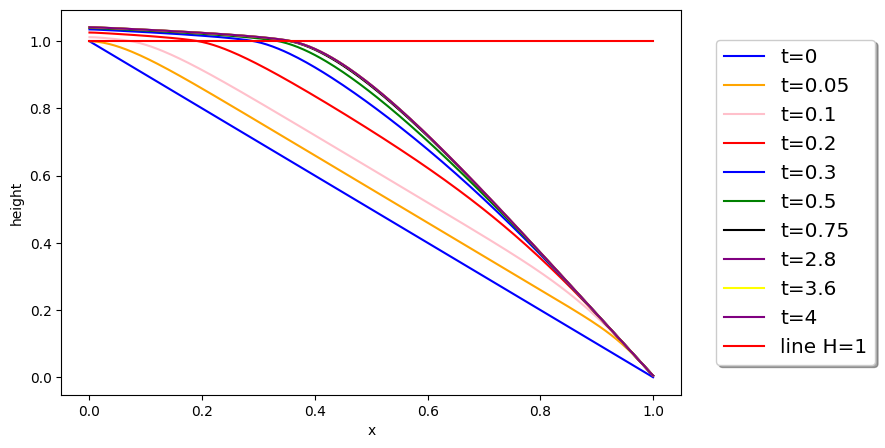

In [51]:
P=np.empty(nx)

for j in range(nx):
    P[j]=1
fig, ax = plt.subplots(figsize=(8,5))  
line,=ax.plot(x,H[0],color='blue',label='t=0')
line,=ax.plot(x,H[1000],color='orange',label='t=0.05')
line,=ax.plot(x,H[2000],color='pink',label='t=0.1')
line,=ax.plot(x,H[4000],color='red',label='t=0.2')
line,=ax.plot(x,H[6000],color='blue',label='t=0.3')
line,=ax.plot(x,H[int(nt/10)],color='green',label='t=0.5')
line,=ax.plot(x,H[int(3*nt/20)],color='black',label='t=0.75')
line,=ax.plot(x,H[7*int(nt/10)],color='purple',label='t=2.8')
line,=ax.plot(x,H[9*int(nt/10)],color='yellow',label='t=3.6')
line,=ax.plot(x,H[nt],color='purple',label='t=4')
line,=ax.plot(x,P,color='red', label= 'line H=1' )#line H=1
legend = ax.legend(bbox_to_anchor=(1.04,0.5), loc='center left', shadow=True, fontsize='x-large')
plt.xlabel('x')
plt.ylabel('height')
'''ax.set_xlim(0., T)
ax.set_ylim(0., N/4)'''


Text(0, 0.5, 'height')

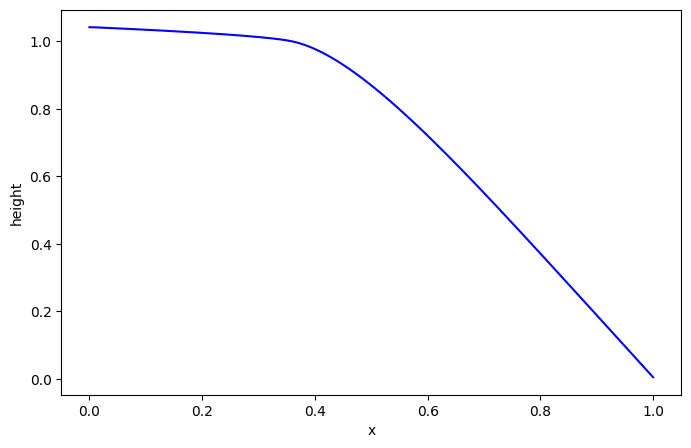

In [52]:
#plot graph at final time as the initial condition.
fig, ax = plt.subplots(figsize=(8,5))  
line,=ax.plot(x,H[nt],color='blue',label='height' )
plt.xlabel('x')
plt.ylabel('height')

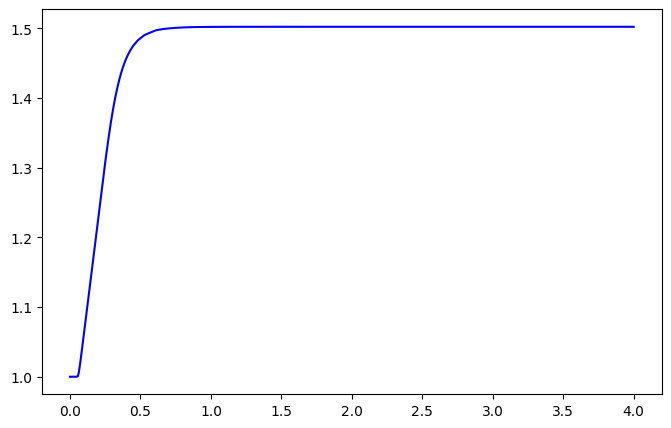

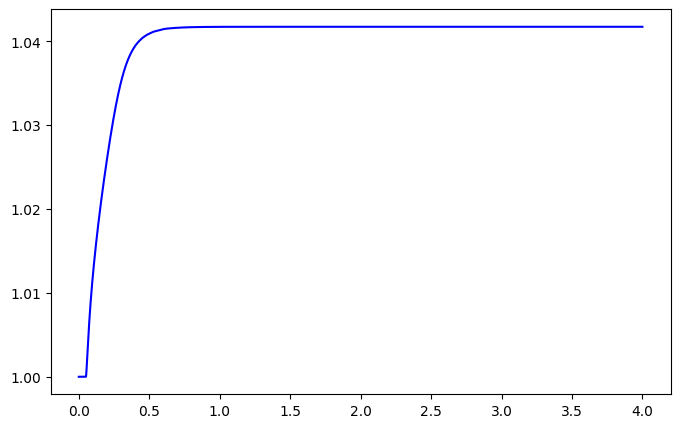

In [173]:
t= np.linspace(0,tf,nt-1)
for j in range(nt-1):
    Q[j,0]=1+mu*(H[j,0]-1)**(5/3) 
fig, ax = plt.subplots(figsize=(8,5)) 
line,=ax.plot(t,Q[:nt-1,0],color='blue',label='height') 
fig, ax = plt.subplots(figsize=(8,5)) 
line,=ax.plot(t,H[:nt-1,0],color='blue',label='height')

Using RK4 to solve the steady state equation for various rainfall functions 

In [174]:

def fr(y,W):
    if W<=1:
        d= 1/sigma*((rho/W)*(1-y**2)-1)
    if W>1:
        d=1/sigma*(rho*(1-y**2)-1-mu*(W-1)**k)
    
    return (d)


1.0
-0.0010738595815234333


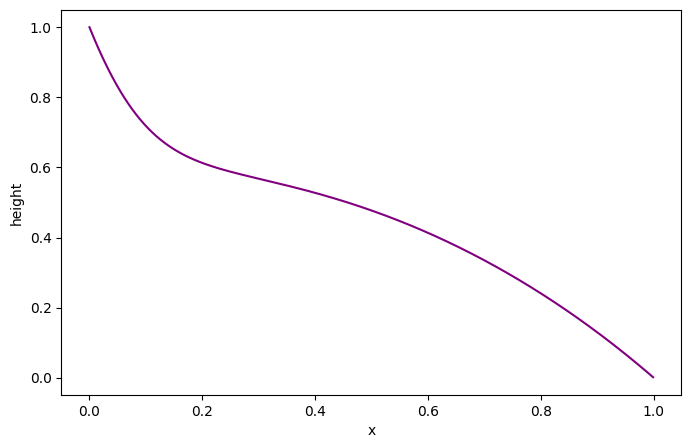

In [176]:
nnx= 1001
mu= 100 
rho=0.6
k=5/3
y=np.linspace(0,1,nnx)
W=np.empty([nnx])

ddx= 1/(nnx-1)
W[0]=1
O=np.empty(nnx)

for j in range(nnx):
    O[j]=1


if rho>1:
    W[0]=((rho-1)/100.0)**(3/5.0)+1
    


for i in range(nnx-1):
    k1 = ddx*fr(y[i],W[i])
    k2 = ddx*fr(y[i]+ddx/2,W[i]+0.5*k1)
    k3= ddx*fr(y[i]+ddx/2,W[i]+0.5*k2)
    k4= ddx*fr(y[i]+ddx,W[i]+k3)
    W[i+1] =W[i] + 1/6 *k1 + 1/3 *(k2+k3) +1/6 *k4 
    
#for i in range(nnx-10,nnx-1):
   # W[i+1]=W[i]+fr(y[i],W[i])*ddx
    
    
        
    
fig, ax = plt.subplots(figsize=(8,5))
line,=ax.plot(y[:nnx-1],W[:nnx-1], color='purple')
#line,=ax.plot(y,O, color='red', linestyle= 'solid')
#line,=ax.plot(x,H[nt],color='green',label='height', linestyle= 'dashed')
plt.xlabel('x')
plt.ylabel('height')
print(W[0])
print(W[nnx-1])

In [167]:

def fo(y,W1):
    if W1<=1:
        d= 1/sigma*((rho/W1)*(1-y)-1)
    if W1>1:
        d=1/sigma*(rho*(1-y)-1-mu*(W1-1)**k)
    
    return (d)

1.0416276603700936
0.0018377223369482041


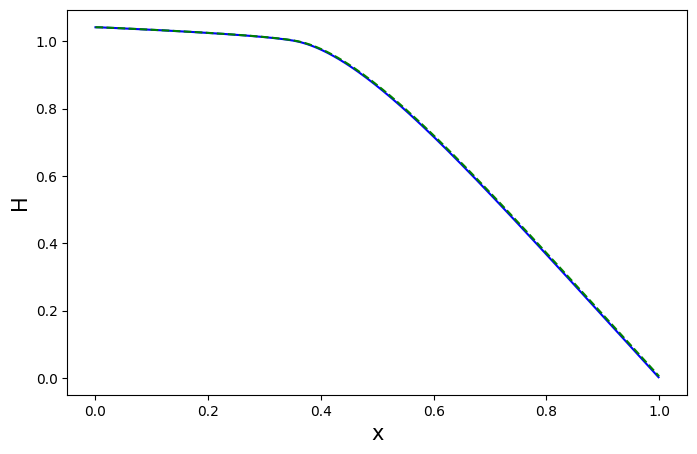

In [171]:
nnx= 1001
mu= 100 
rho=1.5

k=5/3
y=np.linspace(0,1,nnx)
W1=np.empty([nnx])

ddx= 1/(nnx-1)
W1[0]=1
O=np.empty(nnx)

for j in range(nnx):
    O[j]=1


if rho>1:
    W1[0]=((rho-1)/100.0)**(3/5.0)+1
    


for i in range(nnx-1):
    k1 = ddx*fo(y[i],W1[i])
    k2 = ddx*fo(y[i]+ddx/2,W1[i]+0.5*k1)
    k3= ddx*fo(y[i]+ddx/2,W1[i]+0.5*k2)
    k4= ddx*fo(y[i]+ddx,W1[i]+k3)
    W1[i+1] =W1[i] + 1/6 *k1 + 1/3 *(k2+k3) +1/6 *k4 
    
#for i in range(nnx-10,nnx-1):
   # W[i+1]=W[i]+fr(y[i],W[i])*ddx
    
    
        
    
fig, ax = plt.subplots(figsize=(8,5))
#line,=ax.plot(y[:nnx-1],W[:nnx-1], color='purple')
line,=ax.plot(y[:nnx-1],W1[:nnx-1], color='blue')
#line,=ax.plot(y,O, color='red', linestyle= 'solid')
line,=ax.plot(x,H[nt],color='green',label='height', linestyle= 'dashed')
#ax.set_xlim(0., 1)
#ax.set_ylim(0, 1.2)()
plt.xlabel('xlabel', fontsize=15)
plt.ylabel('ylabel', fontsize=15)
fig.savefig('test.jpg')
plt.xlabel('x')
plt.ylabel('H')
print(W1[0])
print(W1[nnx-2])

In [151]:

def fq(y,W3):
    if W3<=1:
        d= 1/sigma*((rho/W3)*(1-y**3)-1)
    if W3>1:
        d=1/sigma*(rho*(1-y**3)-1-mu*(W3-1)**k)
    
    return (d)

1.0416276603700936
0.10801667530874574


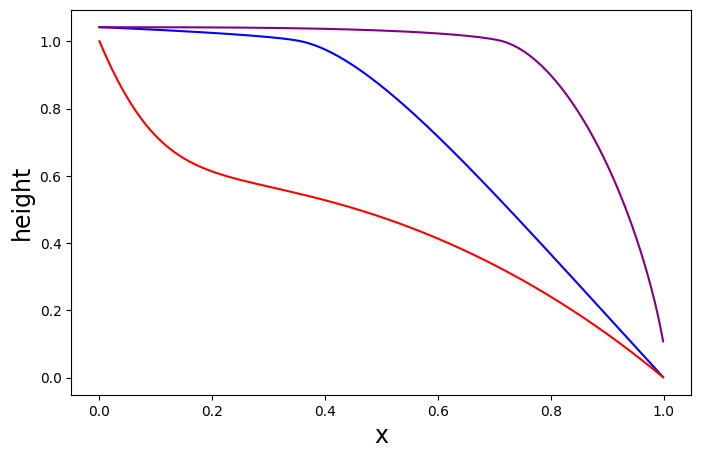

In [177]:
nnx= 1001
mu= 100 
rho=1.5
k=5/3
y=np.linspace(0,1,nnx)
W3=np.empty([nnx])

ddx= 1/(nnx-1)
W3[0]=1
O=np.empty(nnx)

for j in range(nnx):
    O[j]=1


if rho>1:
    W3[0]=((rho-1)/100.0)**(3/5.0)+1
    


for i in range(nnx-1):
    k1 = ddx*fq(y[i],W3[i])
    k2 = ddx*fq(y[i]+ddx/2,W3[i]+0.5*k1)
    k3= ddx*fq(y[i]+ddx/2,W3[i]+0.5*k2)
    k4= ddx*fq(y[i]+ddx,W3[i]+k3)
    W3[i+1] =W3[i] + 1/6 *k1 + 1/3 *(k2+k3) +1/6 *k4 
    
#for i in range(nnx-10,nnx-1):
   # W[i+1]=W[i]+fr(y[i],W[i])*ddx
    
    
        
    
fig, ax = plt.subplots(figsize=(8,5))
line,=ax.plot(y[:nnx-1],W1[:nnx-1], color='blue')
#line,=ax.plot(y[:nnx-1],W2[:nnx-1], color='blue')
line,=ax.plot(y[:nnx-1],W[:nnx-1], color='red')
line,=ax.plot(y[:nnx-1],W3[:nnx-1], color='purple')
#line,=ax.plot(y,O, color='red', linestyle= 'solid')
#line,=ax.plot(x,H[nt],color='green',label='height', linestyle= 'dashed')
#ax.set_xlim(0., 1)
#ax.set_ylim(0, 1)
plt.xlabel('xlabel', fontsize=17)
plt.ylabel('ylabel', fontsize=17)
plt.xlabel('x')
plt.ylabel('height')
print(W3[0])
print(W3[nnx-2]) 

In [178]:

eps= 0.0
def fp(y,W2):
    if W2<=1:
        d= 1/sigma*((rho/(W2+eps))*(y-1)**2-1)
    if W2>1:
        d=1/sigma*(rho*(y-1)**2-1-mu*(W2-1)**k)
    
    return (d)

1.0
1.0416276603700936
0.004467725840791589
-0.5362700708917533
0.0013871449159742722


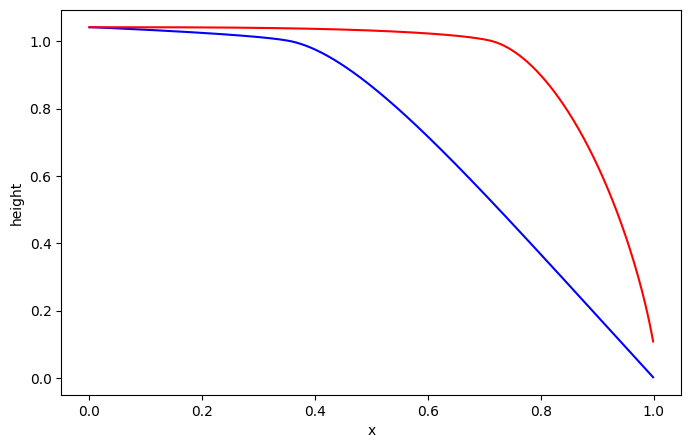

In [179]:
nnx= 1001
mu= 100 
rho=0.9
k=5/3
y=np.linspace(0,1,nnx)
W2=np.empty([nnx])

ddx= 1/(nnx-1)
W2[0]=1
O=np.empty(nnx)

for j in range(nnx):
    O[j]=1


if rho>1:
    W2[0]=((rho-1)/100.0)**(3/5.0)+1
    


for i in range(nnx-1):
    k1 = ddx*fp(y[i],W2[i])
    k2 = ddx*fp(y[i]+ddx/2,W2[i]+0.5*k1)
    k3= ddx*fp(y[i]+ddx/2,W2[i]+0.5*k2)
    k4= ddx*fp(y[i]+ddx,W2[i]+k3)
    W2[i+1] =W2[i] + 1/6 *k1 + 1/3 *(k2+k3) +1/6 *k4 
    
#for i in range (nnx-5000,nnx-1):
    #W2[i+1]=W2[i]+fp(y[i],W2[i])*ddx
    
    
        
    
fig, ax = plt.subplots(figsize=(8,5))
#line,=ax.plot(y[:nnx-1],W[:nnx-1], color='purple')
line,=ax.plot(y[:nnx-1],W1[:nnx-1], color='blue')
#line,=ax.plot(y[:nnx-1],W2[:nnx-1], color='orange')
line,=ax.plot(y[:nnx-1],W3[:nnx-1], color='red')
#line,=ax.plot(y,O, color='red', linestyle= 'solid')
#line,=ax.plot(x,H[nt],color='green',label='height')
#ax.set_xlim(0., 1)
#ax.set_ylim(-0.4, 1)
plt.xlabel('x')
plt.ylabel('height')

print(W2[0])
print(W1[0])
print(W2[int(9*nnx/10)+30])
print(W2[nnx-2])
print(W[nnx-2])

In [13]:
'''t= np.linspace(0,tf,nt-1)
for j in range(nt-1):
    Q[j,0]=1+mu*(H[j,0]-1)**(5/3) 
fig, ax = plt.subplots(figsize=(8,5)) 
line,=ax.plot(t,Q[:nt-1,0],color='blue',label='height') 
fig, ax = plt.subplots(figsize=(8,5)) 
line,=ax.plot(t,H[:nt-1,0],color='blue',label='height')'''

"t= np.linspace(0,tf,nt-1)\nfor j in range(nt-1):\n    Q[j,0]=1+mu*(H[j,0]-1)**(5/3) \nfig, ax = plt.subplots(figsize=(8,5)) \nline,=ax.plot(t,Q[:nt-1,0],color='blue',label='height') \nfig, ax = plt.subplots(figsize=(8,5)) \nline,=ax.plot(t,H[:nt-1,0],color='blue',label='height')"

1.0417453755490416
0.8695163613817324
0.004594305813599582


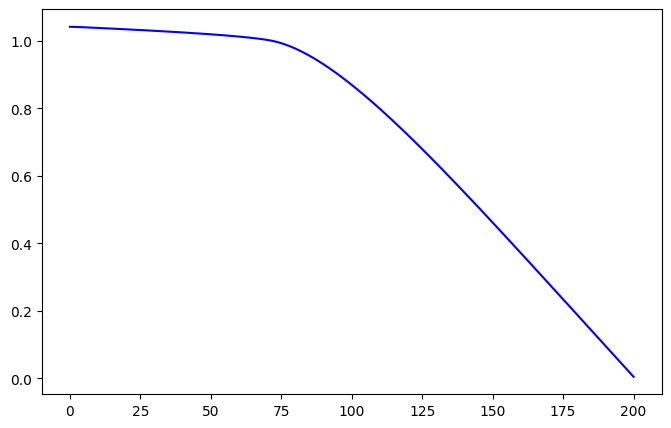

In [125]:
#use the previous steady state as the new initial condition
for i in range(nx):
    J[0,i]=H[nt,i]
    
print(J[0,0])
print(J[0,100])
print(J[0,200])
fig, ax = plt.subplots(figsize=(8,5))  
line,=ax.plot(J[0],color='blue',label='height')

Here we change our rainfall function.

In [127]:
r=1
#r=2-2*x
rho0=1.1    
def seep(J): 
    c= sigma*d2mat@J + mu*5/3*(np.abs(J-1))**(2/3) *(d1mat@J)+rho0*r   #using a linear approximation
    return (c)

0.0031458565330653716
-1.2583426132259263


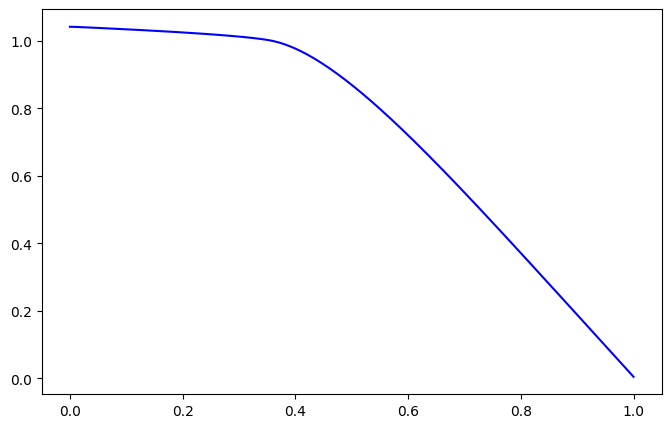

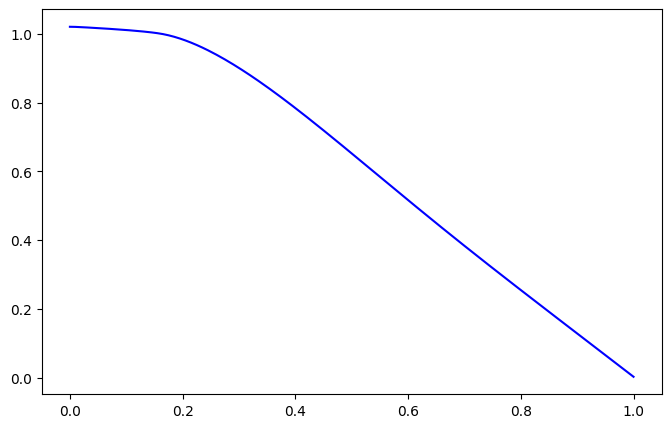

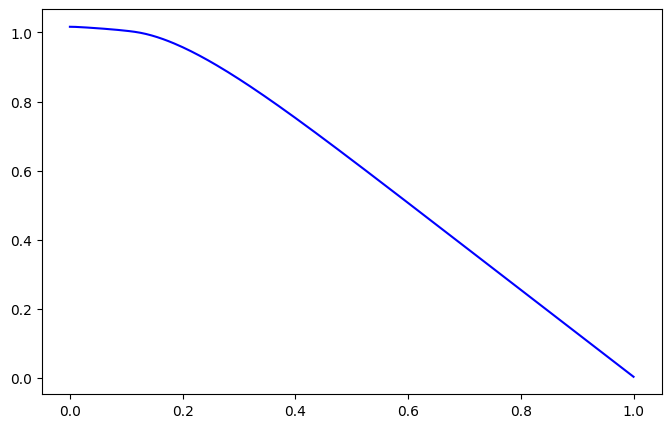

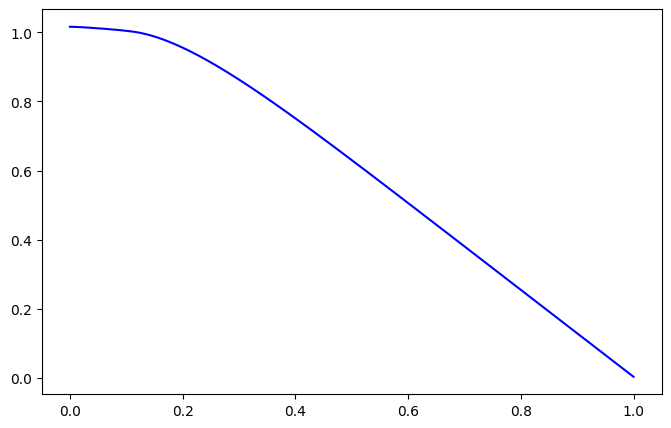

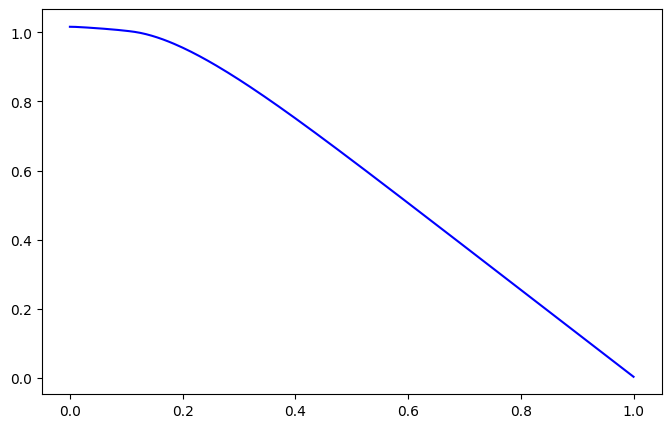

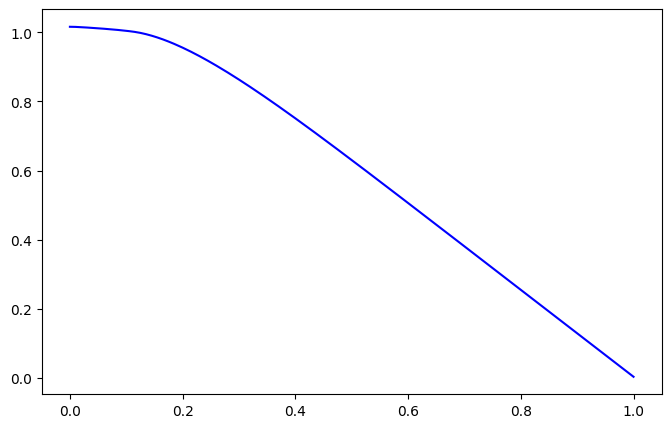

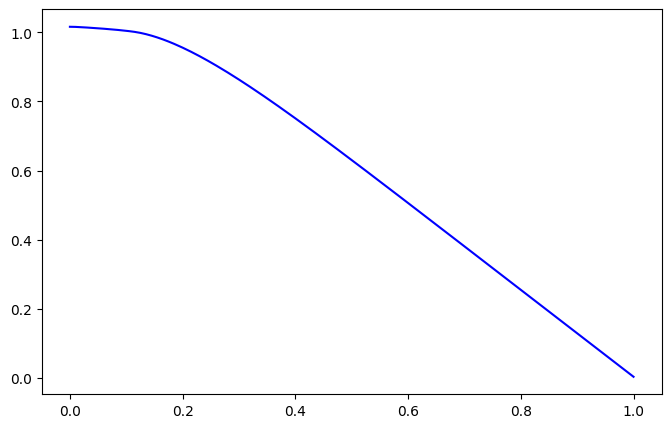

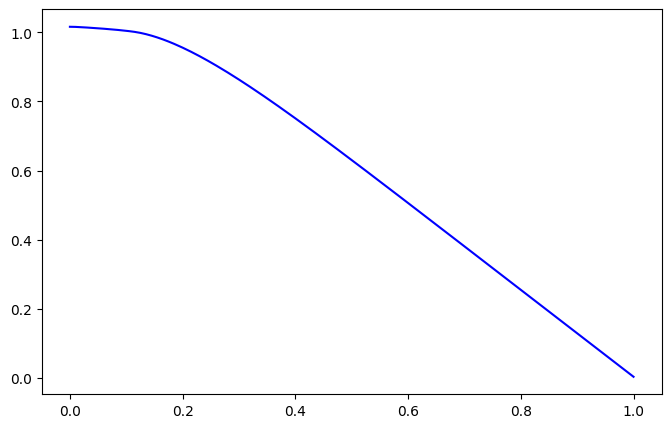

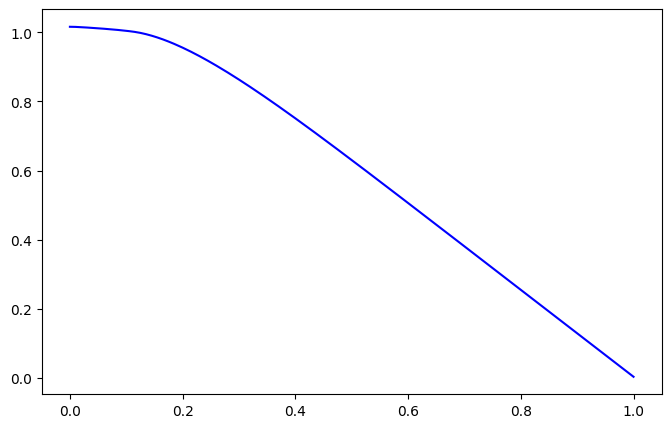

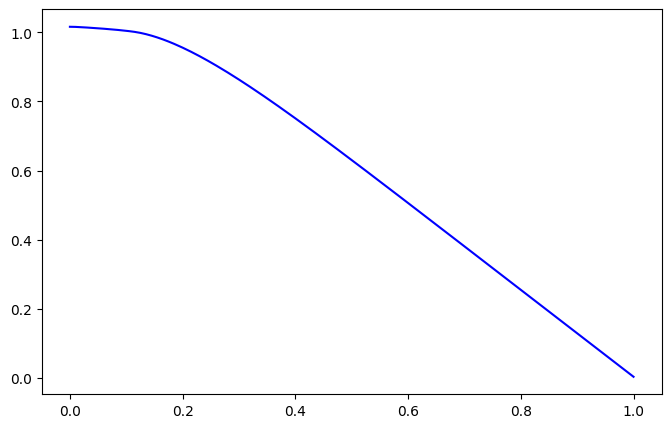

In [128]:
#the part relating to H>1 multiplied by (sign(H-1)+1)/2

#the part relating to H<1 multiplied by (sign(1-H)+1)/2
d1mat[nx-1,nx-2:nx]= np.array([-0.5,-0.5])/dx
d2mat[nx-1,nx-2:nx]= np.array([1,-1])/dx**2
for i in range(nt):
    J[i+1]=J[i]+seep(J[i])*dt*(np.sign(J[i]-1)+1)/2 +fn(J[i])*dt*(np.sign(1-J[i])+1)/2
    J[i+1,0]=4.0/3.0*J[i+1,1]-1/3*J[i+1,2]# implementing boundary conditions
    if J[i+1,0]<=1 :    
        J[i+1,0]=1
    #J[i+1,nx-1]=0 #simplified
    #J[i+1,nx-1]= (-dx/(sigma) -1/2*J[i+1,nx-3]+2*J[i+1,nx-2])*2.0/3.0
    if i%(nt/10)==0:
        fig, ax = plt.subplots(figsize=(8,5))  
        line,=ax.plot(x,J[i],color='blue',label='height')
print(J[nt,200])
print((J[nt,200]-J[nt,199])/dx)

1.016143047146557
0.0031458565330653716
1.0417453755490416
0.8695163613817324
0.004594305813599582


Text(0, 0.5, 'H')

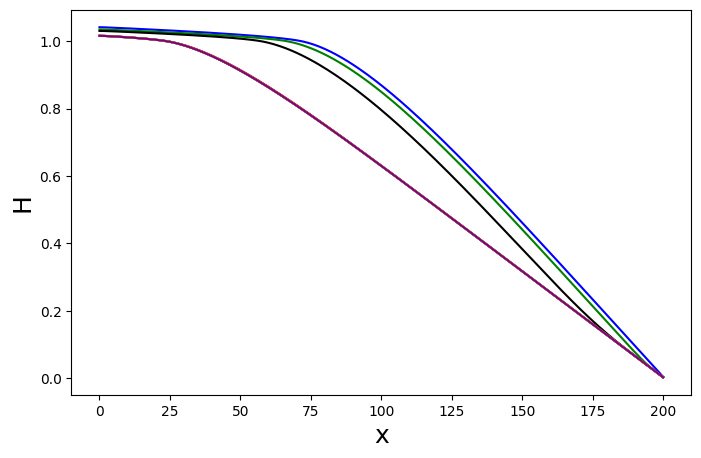

In [129]:
fig, ax = plt.subplots(figsize=(8,5))  
line,=ax.plot(J[0],color='blue',label='height')
line,=ax.plot(J[500],color='green',label='height')
line,=ax.plot(J[2000],color='black',label='height')
line,=ax.plot(J[int(nt/5)],color='red',label='height')
line,=ax.plot(J[3*int(nt/10)],color='blue',label='height')
line,=ax.plot(J[5*int(nt/10)],color='green',label='height')
line,=ax.plot(J[7*int(nt/10)],color='purple',label='height')
line,=ax.plot(J[9*int(nt/10)],color='yellow',label='height')
line,=ax.plot(J[nt],color='purple',label='height')
print(J[nt,0])
print(J[nt,200])
print(J[0,0])
print(J[0,100])
print(J[0,200])
plt.xlabel('x', fontsize=18)
plt.ylabel('H', fontsize=18)

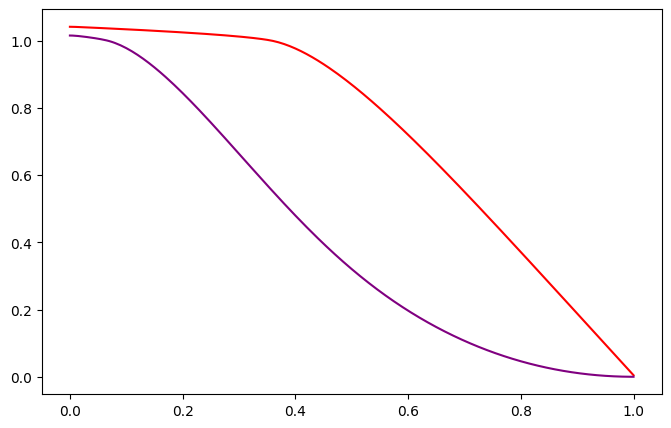

In [122]:
# this is to compare the steady states for various rainfall functions.
fig, ax = plt.subplots(figsize=(8,5)) 
line,=ax.plot(x,H[nt],color='red',label='' )
line,=ax.plot(x,J[nt],color='purple',label='')
#legend = ax.legend(bbox_to_anchor=(1.04,0.5), loc='center left', shadow=True, fontsize='x-large')


Here we look at how the flux and height at the river vary with time when we change the rainfall.

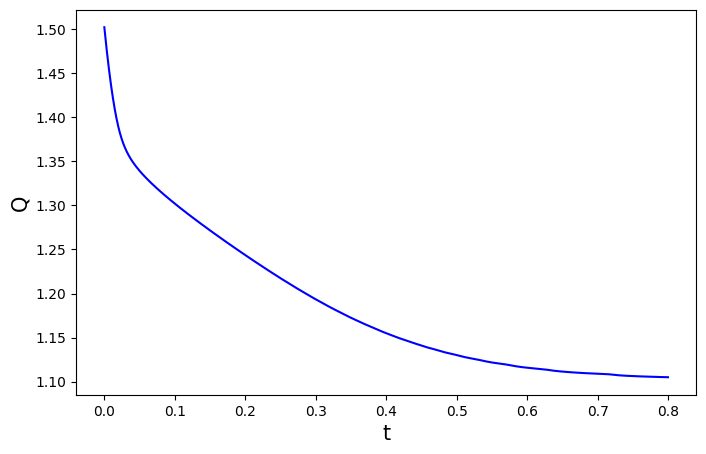

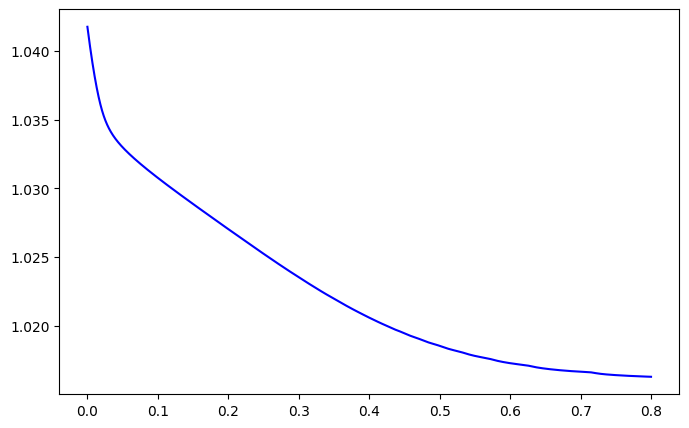

In [130]:
#only valid when J>1
for j in range(nt-1):
    Q[j,0]=1+mu*(J[j,0]-1)**(5/3)
fig, ax = plt.subplots(figsize=(8,5)) 
plt.xlabel('t')
plt.ylabel('Q')
plt.xlabel('t', fontsize=15)
plt.ylabel('Q', fontsize=15)
line,=ax.plot(t[:int(nt/5)-1],Q[:int(nt/5)-1,0],color='blue',label='height') 
fig, ax = plt.subplots(figsize=(8,5)) 
line,=ax.plot(t[:int(nt/5)],J[:int(nt/5),0],color='blue',label='height')



1.0417453755490416
0.8695163613817324
0.004594305813599582


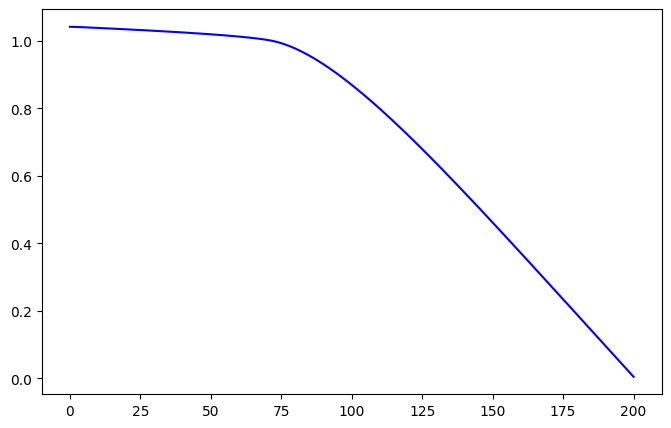

In [180]:

for i in range(nx):
    K[0,i]=J[nt,i]
    
print(J[0,0])
print(J[0,100])
print(J[0,200])
fig, ax = plt.subplots(figsize=(8,5))  
line,=ax.plot(J[0],color='blue',label='height')

In [181]:
r=2*x
rho0=1
def seep(K): 
    c= sigma*d2mat@K + mu*5/3*(np.abs(K-1))**(2/3) *(d1mat@K)+rho0*r   #using a linear approximation
    return (c)

0.006933555441192898
-2.7244252975721897


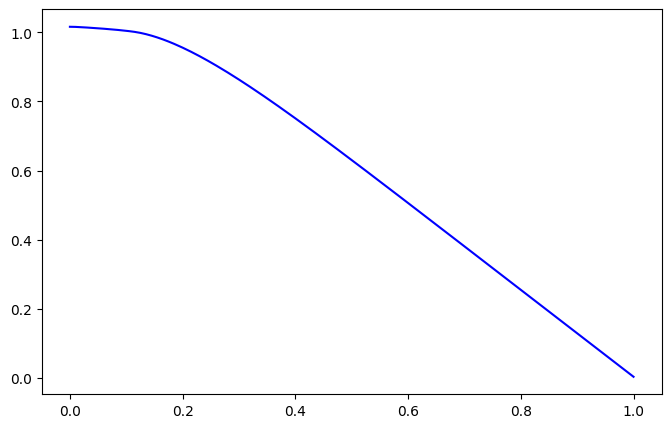

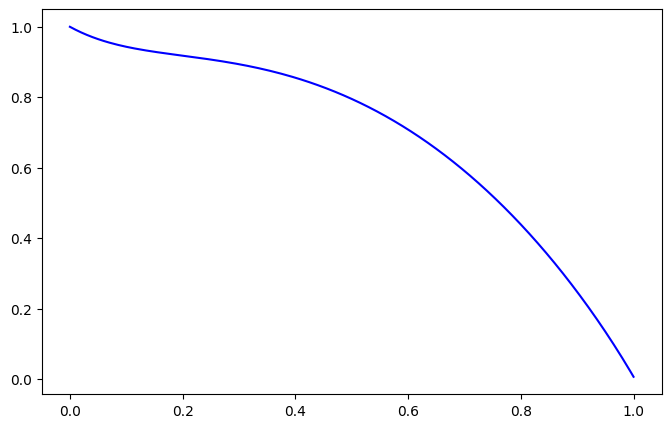

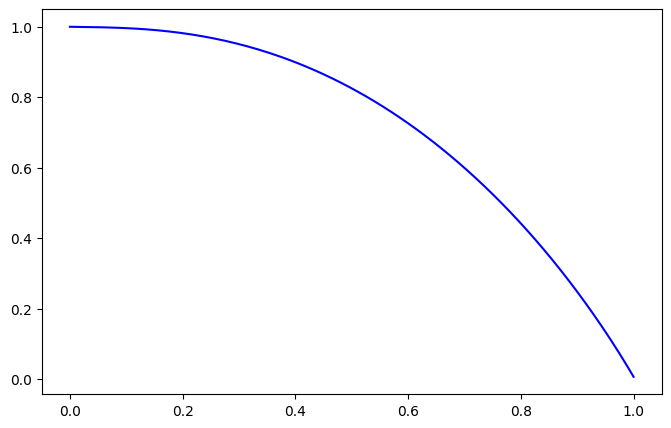

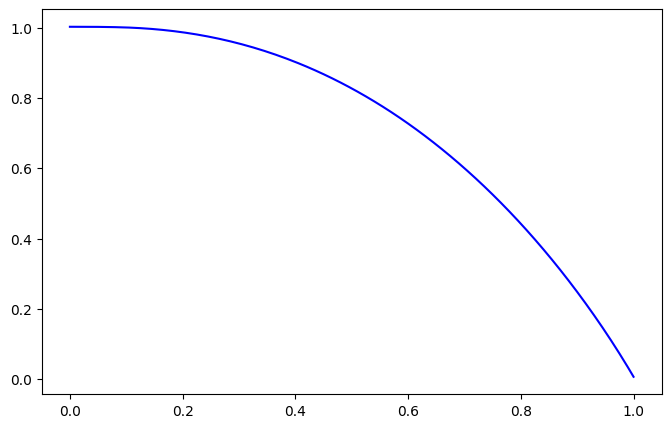

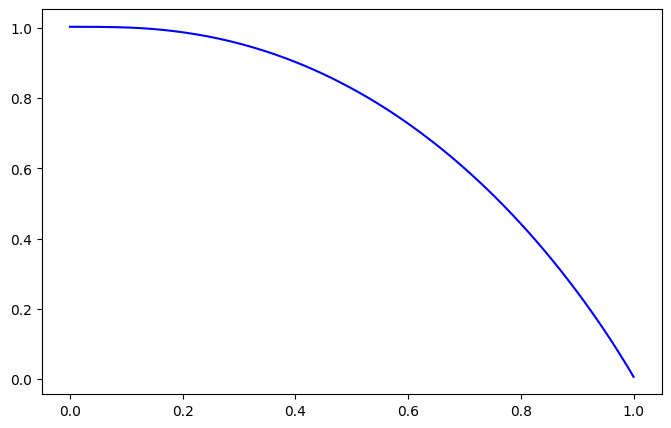

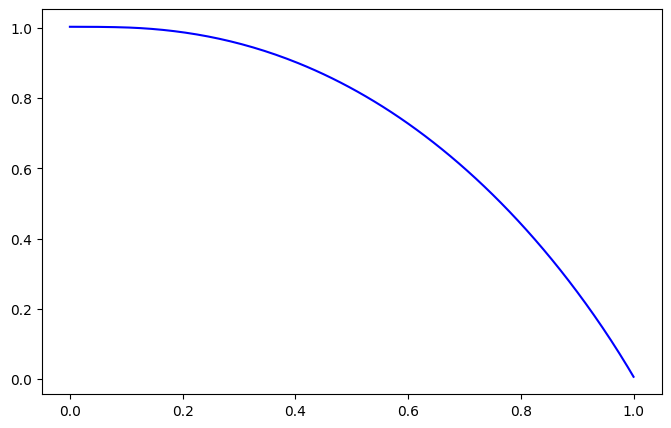

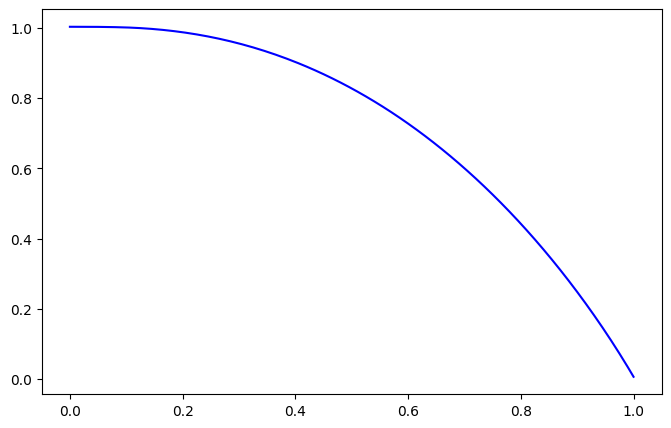

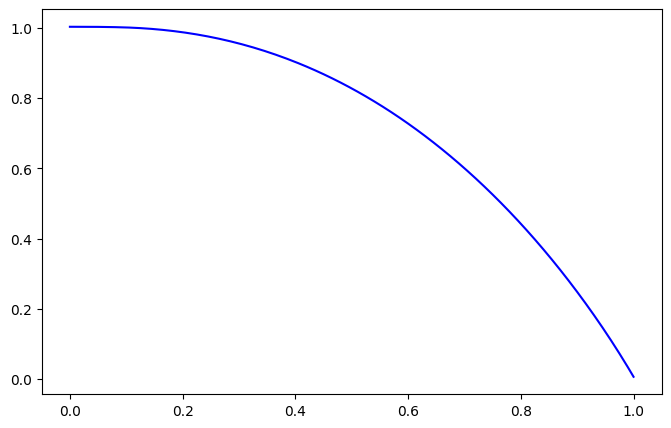

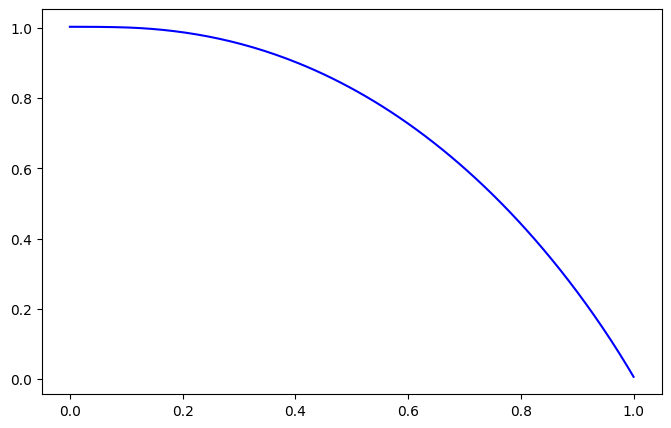

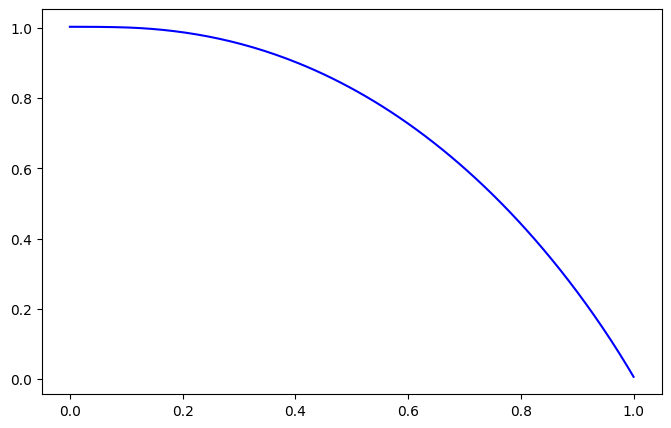

In [182]:
#the part relating to H>1 multiplied by (sign(H-1)+1)/2

#the part relating to H<1 multiplied by (sign(1-H)+1)/2
d1mat[nx-1,nx-2:nx]= np.array([-0.5,-0.5])/dx
d2mat[nx-1,nx-2:nx]= np.array([1,-1])/dx**2
for i in range(nt):
    K[i+1]=K[i]+seep(K[i])*dt*(np.sign(K[i]-1)+1)/2 +fn(K[i])*dt*(np.sign(1-K[i])+1)/2
    K[i+1,0]=4.0/3.0*K[i+1,1]-1/3*K[i+1,2]# implementing boundary conditions
    if K[i+1,0]<=1 :    
        K[i+1,0]=1
    #J[i+1,nx-1]=0 #simplified
    #J[i+1,nx-1]= (-dx/(sigma) -1/2*J[i+1,nx-3]+2*J[i+1,nx-2])*2.0/3.0
    if i%(nt/10)==0:
        fig, ax = plt.subplots(figsize=(8,5))  
        line,=ax.plot(x,K[i],color='blue',label='height')
print(K[nt,200])
print((K[nt,200]-K[nt,199])/dx)

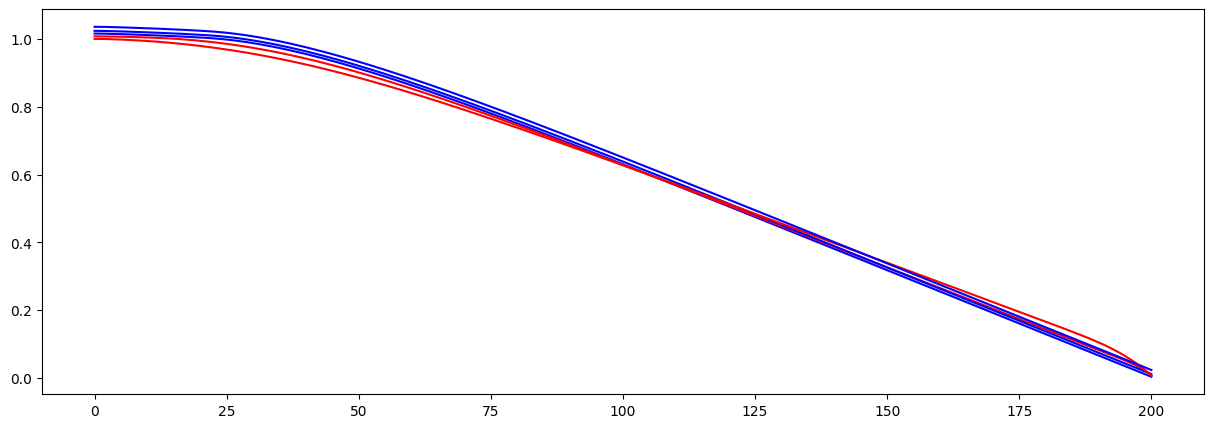

In [184]:
#a= J[0]+(rho-rho0)*t
fig, ax = plt.subplots(figsize=(15,5)) 
line,=ax.plot(K[0]+(rho0-0.6)*0,color='blue',label='height')
line,=ax.plot(K[200],color='red',label='height')
line,=ax.plot(K[0]+(rho0-0.6)*0.02,color='blue',label='height')
line,=ax.plot(K[500],color='red',label='height')
line,=ax.plot(K[0]+(rho0-0.6)*0.05,color='blue',label='height')